In [132]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt


In [133]:
data_path = '../data/ab-test.csv'

In [134]:
df = pd.read_csv(data_path)
df.head(10)

,uid,diff,time,group
0,user_1,-103.333333,after,test
1,user_1,-6.000000,before,test
2,user_18,-10.000000,after,test
3,user_18,-3.500000,before,test
4,user_19,-82.333333,after,test
5,user_19,-148.000000,before,test
6,user_21,-78.500000,after,test
7,user_21,-112.500000,before,test
8,user_25,-127.500000,after,test
9,user_25,-69.333333,before,test


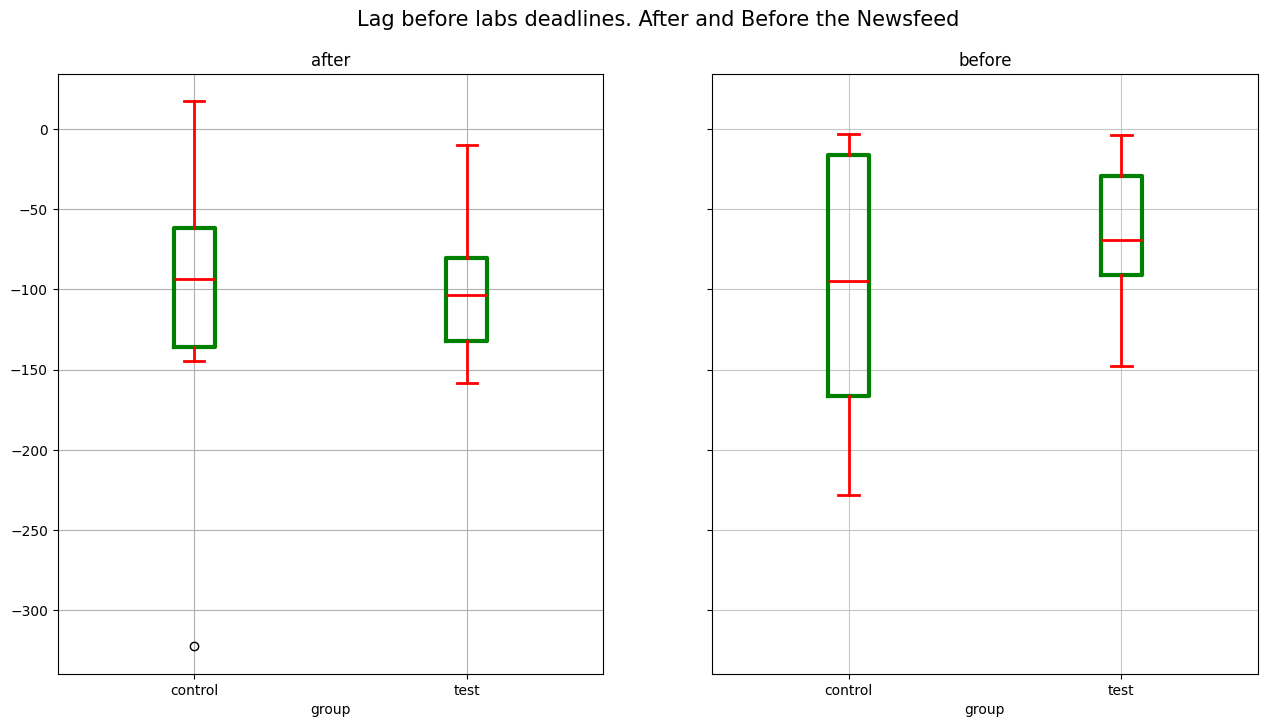

In [135]:
fig, axes = plt.subplots(1,2,figsize=(15,8),sharey=True)

df_before = df[df['time'] == 'before']
df_before.boxplot(column='diff',by='group',ax=axes[1],
                boxprops=dict(color="green", linewidth=3),
                whiskerprops=dict(color="red", linewidth=2),
                capprops=dict(color="red", linewidth=2),
                medianprops=dict(color="red", linewidth=2),

                )

axes[1].set_title('before')


df_after = df[df['time'] == 'after']
df_after.boxplot(column='diff',by='group',ax=axes[0],
                boxprops=dict(color="green", linewidth=3),
                whiskerprops=dict(color="red", linewidth=2),
                capprops=dict(color="red", linewidth=2),
                medianprops=dict(color="red", linewidth=2),
                
                )
axes[0].set_title('after')

plt.suptitle("Lag before labs deadlines. After and Before the Newsfeed",fontsize=15)
plt.grid(True,alpha=0.7)
plt.show()


In [136]:
res = round(
    df_before[df_before['group'] == 'control']['diff'].quantile(0.75) -
    df_before[df_before['group'] == 'control']['diff'].quantile(0.25),
    -1
)
print(res)

150.0


What was the IQR of the control group before the newsfeed?


The answer is 150